# Skup crvenog vina
### Ucitavanje podataka

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
import seaborn as sns
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn import feature_selection
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

In [2]:
np.random.seed(7)

In [3]:
data_red=pd.read_csv('winequality-red.csv',delimiter=';') #ucitavanje parametara belog vina

In [4]:
data_red.head() #prvih 5, izgled tabele

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
y_red=data_red['quality'] #ciljna promenljiva, uzima vrednosti od 1-10, ocena kvaliteta vina

In [6]:
y_red.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [7]:
x_red=data_red.drop(labels='quality',axis=1) #vrednosti atributa

In [8]:
x_red.head()  #prvih 5 instanci

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [9]:
data_red.isnull().any() #nema nula elemeneta, nepopunjenih

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [10]:
len(data_red) #broj instanci

1599

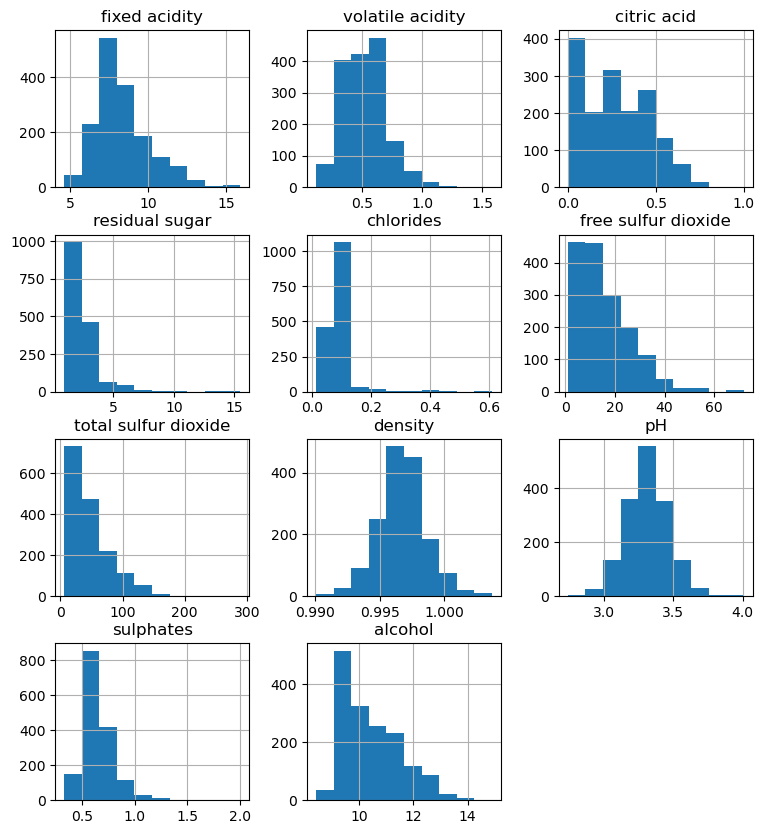

In [12]:
x_red.hist(figsize=(9,10)) # raspodele vrednosti po atributima
plt.savefig('raspodele_atributa_red.png')
plt.show()

In [13]:
len(x_red.columns) # broj kolona, broj atributa

11

In [14]:
imena_kolona=x_red.columns.to_series #imena kolona
imena_kolona

<bound method Index.to_series of Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')>

In [15]:
data_red.info() #informacije o promenljivim, kog su tipa

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [16]:
data_red.describe() #sredina, min, max svih promenljivih u skupu podataka

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


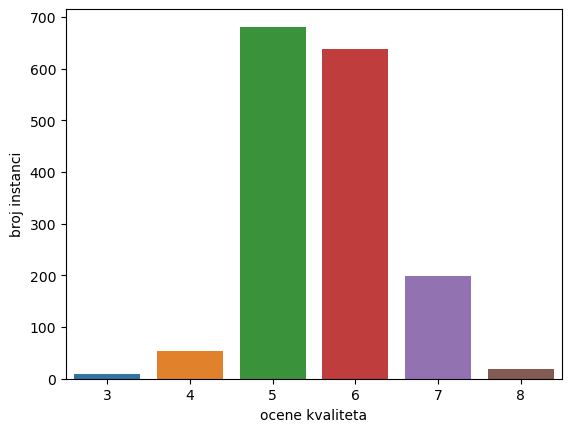

In [17]:

sns.countplot(x ='quality', data = data_red)
plt.xlabel('ocene kvaliteta')
plt.ylabel('broj instanci')
plt.savefig('raspodela_y_red.png')
plt.show() #histogram kako su rasporedjenje ocene kvaliteta belog vina, vidimo da nije balansirana raspodela

iz ovoga vidimo da najvise ima srednjih ocena vina,
malo je odlicnih vina (ocena 8,9), a malo je i losih vina (ocena 3,4)

In [18]:
data_red['quality'].value_counts() #raspodela po ocenama kvaliteta

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [19]:
data_red.shape #4898 instanci, 12 kolona

(1599, 12)

In [20]:
matrica_korelacije=data_red.corr() 
matrica_korelacije            #matrica korelacije

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


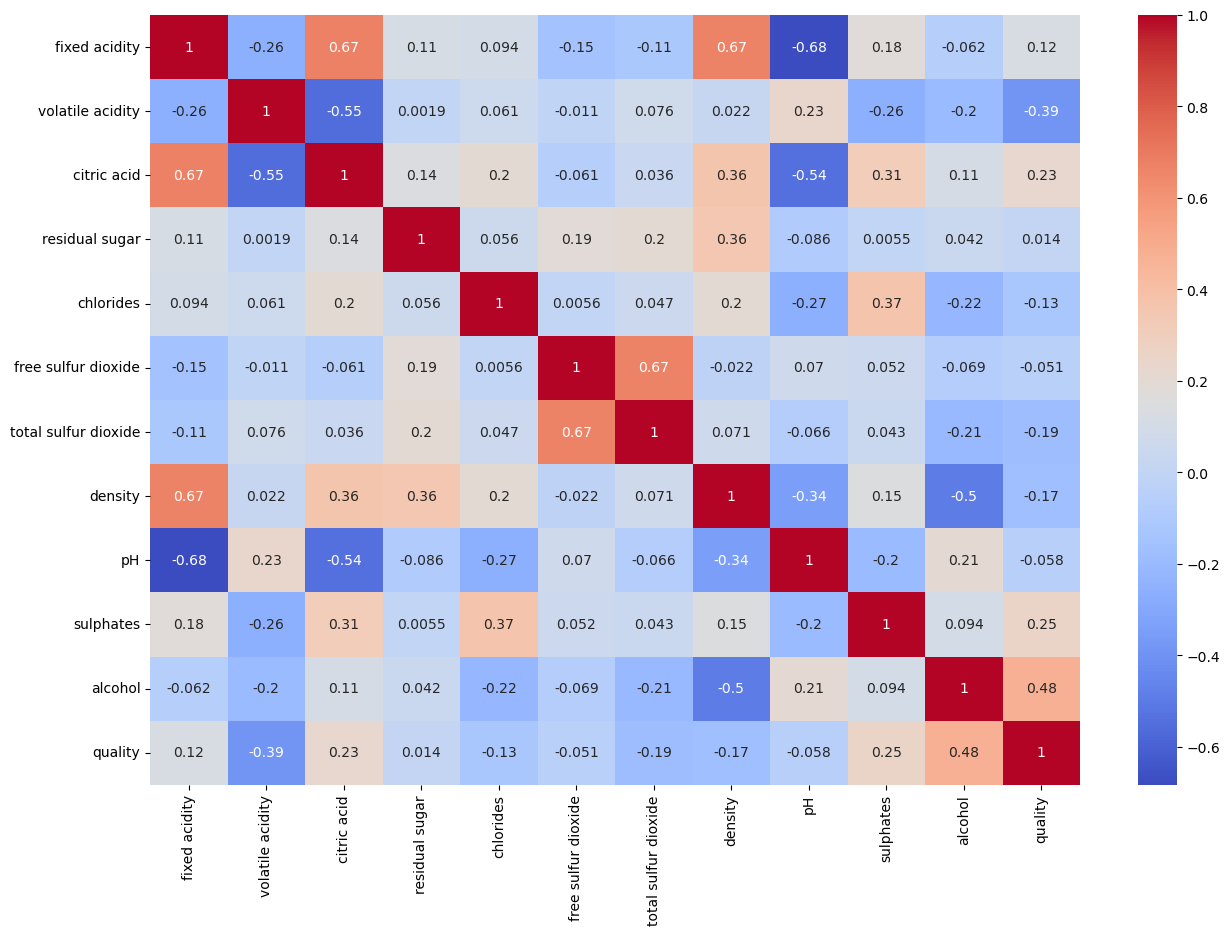

In [21]:
#plt.imshow(matrica_korelacije)
plt.subplots(figsize=(15, 10))
sns.heatmap(matrica_korelacije, annot = True, cmap = 'coolwarm')
plt.savefig('matrica_konfuzije_red.png')
plt.show() #heatmapa korelacija

vidimo ih heatmape visoku povezanost density i residual sugar, kao i density i alcohol ali suprotno korelisano
takodje vidimo poveznaost atributa sa ciljnom promenljivom

In [22]:
def korelacija(value, threshold=0.5):
    if np.abs(value) < threshold:
        return 0
    else:
        return value # da prikaze visoko korelisane

In [23]:
matrica_korelacije.applymap(korelacija)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.000000,0.671703,0.0,0.0,0.000000,0.000000,0.668047,-0.682978,0.0,0.0,0.0
volatile acidity,0.000000,1.000000,-0.552496,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
citric acid,0.671703,-0.552496,1.000000,0.0,0.0,0.000000,0.000000,0.000000,-0.541904,0.0,0.0,0.0
residual sugar,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
chlorides,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
free sulfur dioxide,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.667666,0.000000,0.000000,0.0,0.0,0.0
total sulfur dioxide,0.000000,0.000000,0.000000,0.0,0.0,0.667666,1.000000,0.000000,0.000000,0.0,0.0,0.0
density,0.668047,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0
pH,-0.682978,0.000000,-0.541904,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0
sulphates,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0


In [24]:
x_red.columns #imena kolona

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

#### podela skupa

In [27]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x_red,y_red,test_size=0.2,random_state=7,stratify=y_red)

In [28]:
x_train.shape

(1279, 11)

In [29]:
x_test.shape

(320, 11)

In [30]:
y_train.shape

(1279,)

In [31]:
y_test.shape

(320,)

#### standardizacija

In [32]:
scaler=preprocessing.StandardScaler()

In [33]:
scaler.fit(x_train)

StandardScaler()

In [34]:
x_train=scaler.transform(x_train)

In [35]:
x_test=scaler.transform(x_test)

In [36]:
y_red.shape

(1599,)

## KNN (K najblizih suseda)

In [38]:
#Uzimamo za k brojeve od 1-25
k = range(1, 25)
k_scores = []
# Racunamo ocenu kros validacije za svako k 
for k in k:
    knn_model = KNeighborsClassifier(n_neighbors=k) #minkovski metrika je podrazumevana
    #kros validacija 10 slojeva sa tacnoscu kao metrikom 
    scores = model_selection.cross_val_score(knn_model, x_red, y_red, cv=10, scoring='accuracy') #na celom skupu
    k_scores.append(scores.mean())

In [39]:
k_scores

[0.4495911949685535,
 0.44777908805031447,
 0.4415251572327044,
 0.4552987421383648,
 0.4459080188679246,
 0.4496776729559747,
 0.45466981132075474,
 0.4596580188679245,
 0.46404874213836483,
 0.4646698113207547,
 0.4721776729559748,
 0.47966981132075476,
 0.48092374213836475,
 0.4802751572327044,
 0.47903301886792454,
 0.4827830188679245,
 0.47778694968553453,
 0.49528301886792453,
 0.4928026729559748,
 0.4959198113207547,
 0.4984237421383648,
 0.5096658805031447,
 0.5140487421383647,
 0.5127869496855346]

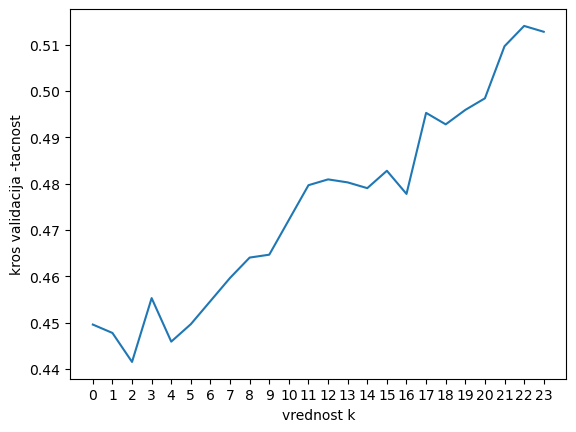

In [40]:
plt.plot(range(k),k_scores)
plt.xticks(range(k))
plt.xlabel('vrednost k')
plt.ylabel('kros validacija -tacnost')
plt.savefig('knn_red.png')
plt.show()

Izabracu k=19 za obucavanje modela, kako sam tu dobila tacnost medju visim

In [57]:
knn_model = KNeighborsClassifier(n_neighbors=22) #treniranje modela za k=22
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=22)

In [58]:
y_pred = knn_model.predict(x_test) #predvijdanje modela na test skupu

In [59]:
y_pred

array([5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 5,
       5, 5, 5, 6, 5, 5, 6, 5, 7, 5, 5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6,
       6, 5, 5, 5, 5, 7, 7, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5,
       6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 6, 7, 5, 6, 5, 5, 6, 6, 7, 6, 7,
       6, 6, 6, 5, 7, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 5, 6, 5,
       6, 5, 6, 6, 6, 6, 7, 6, 5, 6, 6, 6, 7, 6, 5, 6, 6, 5, 5, 7, 7, 5,
       5, 5, 6, 5, 6, 6, 6, 7, 6, 5, 7, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5,
       7, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6,
       6, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 7, 5, 6, 6, 5, 5, 6, 5, 5,
       7, 6, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 7, 5, 6, 5, 6,
       5, 5, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 5, 5, 5,
       6, 6, 5, 5, 5, 5, 6, 6, 7, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       5, 6, 5, 5, 6, 7, 5, 6, 5, 6, 6, 5, 6, 6, 7, 6, 5, 6, 6, 5, 5, 5,
       5, 6, 6, 5, 6, 5, 7, 6, 6, 6, 6, 6, 7, 5, 5,

In [60]:
print(metrics.classification_report(y_test, y_pred)) #izvestaj

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.67      0.73      0.70       136
           6       0.58      0.66      0.62       128
           7       0.52      0.33      0.40        40
           8       0.00      0.00      0.00         3

    accuracy                           0.62       320
   macro avg       0.29      0.29      0.29       320
weighted avg       0.58      0.62      0.59       320



In [61]:
tacnost_knn=metrics.accuracy_score(y_test,y_pred) #tacnost modela
tacnost_knn

0.615625

## Linearna regresija sa tezinama

In [62]:
lm=linear_model.LinearRegression()

In [63]:
w1=1/y_train
w2=np.abs((1-np.sum(y_train))/y_train)
w3= np.abs(np.random.randn(3918))

In [64]:
lm.fit(x_train,y_train,sample_weight=w1)

LinearRegression()

In [65]:
y_predd=lm.predict(x_test)

In [66]:
y_predd

array([4.72288829, 5.38162104, 5.40149459, 5.13462552, 5.97920441,
       5.03425655, 5.82095111, 5.00841504, 4.68578932, 4.84426343,
       4.97691085, 6.2842134 , 5.95113159, 5.73930966, 5.73519298,
       5.93599948, 5.13541215, 5.96042684, 6.11532711, 6.04824286,
       6.11293886, 5.42523426, 5.2054915 , 5.44558022, 5.60416654,
       6.09025568, 5.28435862, 5.02219664, 5.76651053, 6.50924668,
       6.43687114, 5.34949663, 5.11914181, 5.40885342, 5.26313541,
       5.77038534, 5.56391019, 5.57087423, 5.3994657 , 6.30350679,
       5.34000835, 6.02438427, 6.15199736, 5.9947341 , 6.09904225,
       5.18910339, 5.077244  , 5.01743694, 5.237368  , 6.51479101,
       6.38926246, 4.89203852, 5.14693146, 6.03604999, 5.34509039,
       5.78612554, 6.34762014, 6.32725262, 5.58423135, 5.66095361,
       5.67989288, 5.61011637, 5.56209672, 5.11484098, 5.04353851,
       5.53939498, 5.79159299, 4.91555318, 4.82792302, 5.69622649,
       6.0758726 , 5.61212762, 6.40258992, 5.11843357, 5.12628

In [67]:
y_predd=y_predd.round()
y_predd

array([5., 5., 5., 5., 6., 5., 6., 5., 5., 5., 5., 6., 6., 6., 6., 6., 5.,
       6., 6., 6., 6., 5., 5., 5., 6., 6., 5., 5., 6., 7., 6., 5., 5., 5.,
       5., 6., 6., 6., 5., 6., 5., 6., 6., 6., 6., 5., 5., 5., 5., 7., 6.,
       5., 5., 6., 5., 6., 6., 6., 6., 6., 6., 6., 6., 5., 5., 6., 6., 5.,
       5., 6., 6., 6., 6., 5., 5., 5., 5., 5., 6., 5., 6., 5., 5., 6., 6.,
       6., 5., 6., 6., 6., 6., 5., 6., 6., 6., 6., 5., 6., 6., 6., 5., 6.,
       6., 6., 5., 5., 6., 6., 6., 5., 6., 5., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 5., 6., 6., 5., 5., 7., 7., 5., 6., 5., 6., 5.,
       6., 6., 6., 7., 6., 6., 6., 6., 5., 5., 5., 6., 6., 5., 6., 5., 6.,
       5., 6., 6., 6., 6., 5., 5., 6., 6., 5., 6., 6., 6., 5., 6., 6., 5.,
       6., 6., 5., 5., 6., 6., 5., 6., 6., 5., 6., 6., 5., 6., 6., 6., 5.,
       6., 6., 6., 5., 5., 5., 6., 5., 6., 5., 5., 7., 6., 5., 5., 6., 5.,
       5., 5., 5., 6., 5., 5., 5., 5., 5., 6., 5., 7., 5., 5., 4., 6., 5.,
       5., 7., 5., 5., 6.

In [68]:
metrics.mean_squared_error(y_test,y_predd)

0.528125

In [69]:
metrics.mean_absolute_percentage_error(y_test,y_predd)

0.08265625

In [70]:
metrics.r2_score(y_test,y_predd)

0.1815485198861917

In [71]:
print(metrics.accuracy_score(y_test,y_predd))

0.584375


In [91]:
print(metrics.classification_report(y_test, y_predd))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.66      0.70      0.68       136
           6       0.52      0.66      0.58       128
           7       0.64      0.17      0.27        40
           8       0.00      0.00      0.00         3

    accuracy                           0.58       320
   macro avg       0.30      0.26      0.26       320
weighted avg       0.57      0.58      0.56       320



## AdaBoost

Ada boost je model koji se zasniva na promenljivim tezinama instanci. Prvo se pravi bazni model.

In [72]:
base_estimator = ensemble.RandomForestClassifier(n_estimators=100, random_state=7) #bazni model

In [73]:
#pravljenje ansambla
adaboost = ensemble.AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50,random_state=7)

In [74]:
# treniranje modela 
adaboost.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=7),
                   random_state=7)

In [75]:
# predvidjanje na test skupu 
y_preddd = adaboost.predict(x_test)

In [76]:
print(metrics.classification_report(y_test, y_preddd))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.74      0.82      0.77       136
           6       0.68      0.70      0.69       128
           7       0.69      0.62      0.66        40
           8       1.00      0.33      0.50         3

    accuracy                           0.71       320
   macro avg       0.52      0.41      0.44       320
weighted avg       0.68      0.71      0.69       320



In [77]:
print(metrics.confusion_matrix(y_test,y_preddd))

[[  0   0   2   0   0   0]
 [  0   0   7   4   0   0]
 [  0   0 111  24   1   0]
 [  0   0  30  90   8   0]
 [  0   0   1  14  25   0]
 [  0   0   0   0   2   1]]


In [78]:
print(metrics.accuracy_score(y_test,y_preddd))

0.709375


In [79]:
metrics.mean_squared_error(y_test,y_preddd)

0.365625

In [80]:
metrics.r2_score(y_test,y_preddd)

0.4333797445365942

In [81]:
metrics.mean_absolute_percentage_error(y_test,y_preddd)

0.059851190476190474

### Multinomijalna logisticka regresija

In [82]:
mlr=linear_model.LogisticRegression(multi_class='multinomial',max_iter=1000,solver='newton-cg')

In [83]:
mlr.fit(x_train,y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='newton-cg')

In [84]:
y_predddd=mlr.predict(x_test)

In [85]:
y_predddd

array([5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6,
       5, 5, 6, 6, 5, 5, 6, 6, 7, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6,
       6, 5, 5, 5, 5, 7, 7, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6,
       6, 5, 5, 6, 6, 6, 7, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 7,
       6, 6, 6, 5, 7, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 5, 6, 5,
       6, 5, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 7, 6, 5, 6, 6, 5, 5, 7, 7, 5,
       6, 5, 6, 5, 6, 6, 6, 7, 6, 6, 7, 6, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5,
       6, 6, 7, 6, 5, 5, 5, 5, 5, 5, 6, 6, 4, 6, 6, 5, 6, 6, 5, 5, 5, 6,
       5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 7, 5, 5, 5, 6, 5, 6, 5, 5,
       7, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 7, 5, 5, 5, 6,
       4, 5, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 7, 5, 5, 5, 6, 5, 5, 5,
       6, 6, 5, 5, 5, 5, 6, 7, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6,
       5, 6, 5, 5, 6, 7, 5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5,
       5, 6, 6, 5, 6, 5, 7, 6, 6, 6, 6, 6, 7, 5, 5,

In [86]:
print(metrics.confusion_matrix(y_test,y_predddd))

[[ 0  0  2  0  0  0]
 [ 0  0  7  4  0  0]
 [ 0  0 99 37  0  0]
 [ 0  2 36 83  7  0]
 [ 0  0  1 25 14  0]
 [ 0  0  0  3  0  0]]


In [87]:
print(metrics.classification_report(y_test,y_predddd))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.68      0.73      0.70       136
           6       0.55      0.65      0.59       128
           7       0.67      0.35      0.46        40
           8       0.00      0.00      0.00         3

    accuracy                           0.61       320
   macro avg       0.32      0.29      0.29       320
weighted avg       0.59      0.61      0.59       320



In [88]:
metrics.mean_squared_error(y_test,y_predddd)

0.5

In [89]:
metrics.r2_score(y_test,y_predddd)

0.22513469338337677

In [90]:
metrics.mean_absolute_percentage_error(y_test,y_predddd)

0.07788690476190477